In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt

In [326]:
df = pd.read_csv('takehome_users.csv', encoding='latin-1')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [328]:
df["active"] = False

In [329]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [330]:
df_eng = pd.read_csv('takehome_user_engagement.csv', parse_dates=True)
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [331]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [332]:
df_week = df_eng
df_week.drop(['visited'], axis=1, inplace=True)
df_week['date']= pd.to_datetime(df_week['time_stamp']).dt.date
df_week.drop(['time_stamp'], axis=1, inplace=True)
df_week.head()

,user_id,date
0,1,2014-04-22
1,2,2013-11-15
2,2,2013-11-29
3,2,2013-12-09
4,2,2013-12-25


In [333]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  207917 non-null  int64 
 1   date     207917 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.2+ MB


In [334]:
df_week = df_week.drop_duplicates()

In [335]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  207917 non-null  int64 
 1   date     207917 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.8+ MB


In [336]:
df_week.groupby(['user_id','date']).size()

user_id  date      
1        2014-04-22    1
2        2013-11-15    1
         2013-11-29    1
         2013-12-09    1
         2013-12-25    1
                      ..
11996    2013-09-06    1
11997    2013-01-15    1
11998    2014-04-27    1
11999    2012-06-02    1
12000    2014-01-26    1
Length: 207917, dtype: int64

In [337]:
s = df_week.groupby(['user_id']).count()
s['counts'] = s['date']
s.drop(['date'], axis=1, inplace=True)

In [338]:
s[s['counts']<3].counts.value_counts()

1    6235
2     340
Name: counts, dtype: int64

In [339]:
s = s[s['counts']<3]

In [340]:
df_week = df_week[~df_week['user_id'].isin(s.index)]

In [341]:
df_week.head()

,user_id,date
1,2,2013-11-15
2,2,2013-11-29
3,2,2013-12-09
4,2,2013-12-25
5,2,2013-12-31


In [342]:
test_users = df_week.user_id.unique()
for i in test_users:
    dates = df_week[df_week['user_id'] == i].date.values.tolist()
    for d in range(0,len(dates)-2):
        if((dates[d+2] - dates[d]) <= timedelta(days=7)):
            df['active'][i+1] = True
            break

/home/niteesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [343]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [344]:
df.active.value_counts()

False    10344
True      1656
Name: active, dtype: int64

In [345]:
df['email'] = df['email'].apply(lambda x: x[x.find('@')+1:])
df['email'].value_counts()[:8]

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
mumdc.com            2
xybhi.com            2
Name: email, dtype: int64

In [346]:
emails = ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']
df['email'] = df['email'].apply(lambda x: 'random' if x not in emails else x[:x.find('.')])

In [347]:
df['email'].value_counts()[:8]

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
random        1186
gustr         1179
hotmail       1165
Name: email, dtype: int64

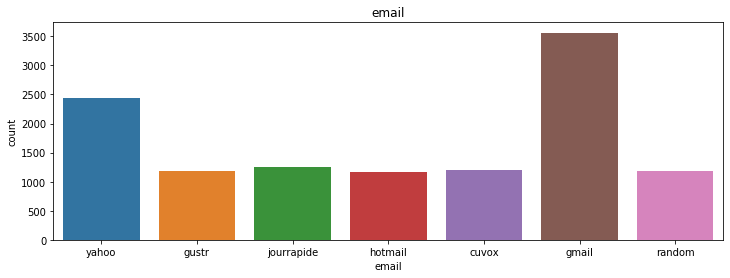

email       active
cuvox       False     1035
            True       167
gmail       False     3087
            True       475
gustr       False     1015
            True       164
hotmail     False      990
            True       175
jourrapide  False     1084
            True       175
random      False     1012
            True       174
yahoo       False     2121
            True       326
Name: active, dtype: int64


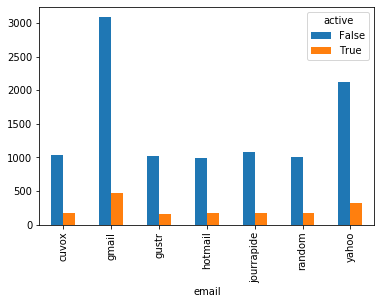

In [348]:
plt.figure(figsize=(12,4))
sns.countplot(x='email', data=df).set_title("email")
plt.show()
df.groupby(['active'])['email'].value_counts().unstack(0).plot.bar()
print(df.groupby(['email'])['active'].value_counts())

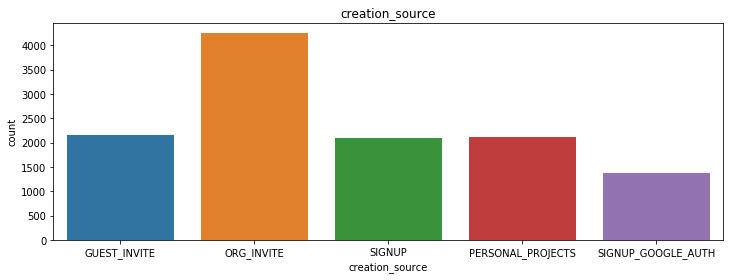

creation_source     active
GUEST_INVITE        False     1861
                    True       302
ORG_INVITE          False     3658
                    True       596
PERSONAL_PROJECTS   False     1828
                    True       283
SIGNUP              False     1794
                    True       293
SIGNUP_GOOGLE_AUTH  False     1203
                    True       182
Name: active, dtype: int64


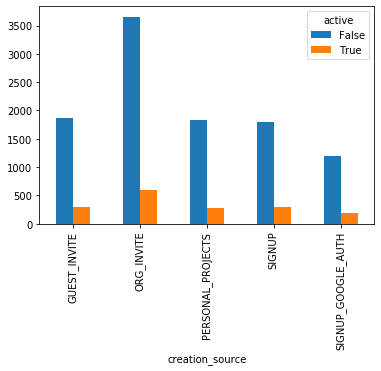

In [349]:
plt.figure(figsize=(12,4))
sns.countplot(x='creation_source', data=df).set_title("creation_source")
plt.show()
df.groupby(['active'])['creation_source'].value_counts().unstack(0).plot.bar()
print(df.groupby(['creation_source'])['active'].value_counts())

opted_in_to_mailing_list  active
0                         False     7773
                          True      1233
1                         False     2571
                          True       423
Name: active, dtype: int64


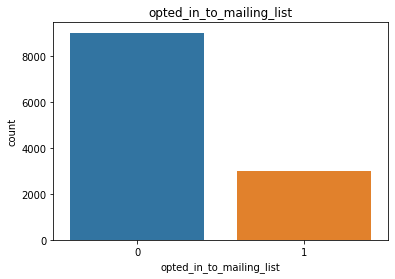

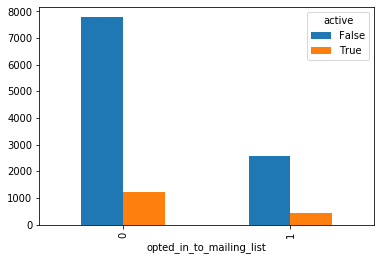

In [350]:
sns.countplot(x='opted_in_to_mailing_list', data=df).set_title("opted_in_to_mailing_list")
df.groupby(['active'])['opted_in_to_mailing_list'].value_counts().unstack(0).plot.bar()
print(df.groupby(['opted_in_to_mailing_list'])['active'].value_counts())

enabled_for_marketing_drip  active
0                           False     8819
                            True      1389
1                           False     1525
                            True       267
Name: active, dtype: int64


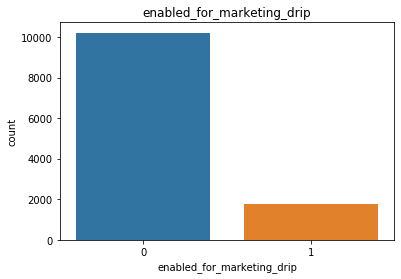

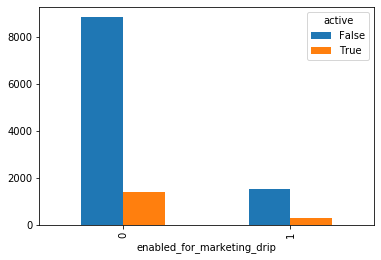

In [351]:
sns.countplot(x='enabled_for_marketing_drip', data=df).set_title("enabled_for_marketing_drip")
df.groupby(['active'])['enabled_for_marketing_drip'].value_counts().unstack(0).plot.bar()
print(df.groupby(['enabled_for_marketing_drip'])['active'].value_counts())

In [352]:
df['invited_by_user_id'].value_counts().head()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
Name: invited_by_user_id, dtype: int64

In [353]:
df.org_id.value_counts()[:10]

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [354]:
df = df.drop(['org_id', 'invited_by_user_id'], axis=1)

In [355]:
# Number of days after creation too last session
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'], unit ='s')

In [356]:
df['days_active'] = df['last_session_creation_time'] - df['creation_time']
df['days_active'] = df['days_active'].dt.days

In [357]:
df['days_inactive'] = max(df['creation_time']) - df['last_session_creation_time']
df['days_inactive'] = df['days_inactive'].dt.days

In [358]:
df = df.drop(['last_session_creation_time', 'creation_time'], axis=1)

In [359]:
df.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active,days_active,days_inactive
0,1,Clausen August,yahoo,GUEST_INVITE,1,0,False,0.0,38.0
1,2,Poole Matthew,gustr,ORG_INVITE,0,0,False,136.0,60.0
2,3,Bottrill Mitchell,gustr,ORG_INVITE,0,0,False,0.0,437.0
3,4,Clausen Nicklas,yahoo,GUEST_INVITE,0,0,True,1.0,373.0
4,5,Raw Grace,yahoo,GUEST_INVITE,0,0,False,5.0,493.0


In [360]:
df = df.drop(['name', 'object_id'], axis=1)

In [361]:
df.head()

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active,days_active,days_inactive
0,yahoo,GUEST_INVITE,1,0,False,0.0,38.0
1,gustr,ORG_INVITE,0,0,False,136.0,60.0
2,gustr,ORG_INVITE,0,0,False,0.0,437.0
3,yahoo,GUEST_INVITE,0,0,True,1.0,373.0
4,yahoo,GUEST_INVITE,0,0,False,5.0,493.0


In [380]:
df['days_active'] = df['days_active'].fillna(df['days_active'].mean())
df['days_inactive'] = df['days_inactive'].fillna(df['days_inactive'].mean())

In [412]:
df_rf = df

In [381]:
df_rf = pd.get_dummies(df, columns = ['email', 'creation_source'], drop_first=True)

In [413]:
X = df_rf.drop('active', axis=1)
y = df_rf['active']

In [421]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   email                       12000 non-null  object 
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   days_active                 12000 non-null  float64
 5   days_inactive               12000 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 562.6+ KB


In [415]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(X_train.shape)
print(X_test.shape)

(9600, 6)
(2400, 6)


In [386]:
sc = StandardScaler()
X_train.loc[:,["days_active","days_inactive"]] = sc.fit_transform(X_train[["days_active","days_inactive"]])
X_test.loc[:,["days_active","days_inactive"]] = sc.transform(X_test[["days_active","days_inactive"]])

/home/niteesh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/niteesh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [416]:
X_train.head()

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,days_active,days_inactive
7917,random,ORG_INVITE,0,0,0.0,607.0
4522,gustr,GUEST_INVITE,0,0,2.0,200.0
7804,yahoo,SIGNUP,0,0,267.0,-5.0
11793,gmail,ORG_INVITE,0,0,0.0,291.0
801,gmail,SIGNUP_GOOGLE_AUTH,0,0,0.0,436.0


In [417]:
X_test.head()

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,days_active,days_inactive
469,gustr,PERSONAL_PROJECTS,1,1,59.222147,256.622011
2274,jourrapide,ORG_INVITE,0,0,59.222147,256.622011
4997,yahoo,SIGNUP,0,0,0.000000,370.000000
304,gmail,SIGNUP_GOOGLE_AUTH,1,1,82.000000,0.000000
10437,gmail,SIGNUP,0,0,0.000000,61.000000


In [419]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [420]:
classifier = GradientBoostingClassifier(verbose=True)
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'random'

In [409]:
classifier.score(X_test, y_test)

0.8620833333333333

In [411]:
confusion_matrix(y_test, classifier.predict(X_test))

array([[2068,    1],
       [ 330,    1]])

In [392]:
n = [20,40,80,160,240]
features = [8, 11, 14, 'auto']
oob = [True, False]
param_grid = {'n_estimators': n, 'max_features': features, 'oob_score': oob}

In [393]:
cv = GridSearchCV(clf, param_grid, cv=5) 
cv.fit(X_train, y_train)
y_predict = cv.predict(X_test) 

/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: So

In [394]:
print("Best Parameter: ", cv.best_params_)
print("Best Score: ", cv.best_score_)


Best Parameter:  {'max_features': 11, 'n_estimators': 20, 'oob_score': True}
Best Score:  0.8439583333333334


In [ ]:
clf.predict(X_test)

In [406]:
print(classification_report(y_test, clf.predict(X_test)))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [396]:
print("Test Accuracy ", accuracy_score(y_test, y_predict))

Test Accuracy  0.84


In [397]:
confusion_matrix(y_test, y_predict)

array([[2009,   60],
       [ 324,    7]])

In [398]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Text(0.5, 1.0, 'ROC Curve')

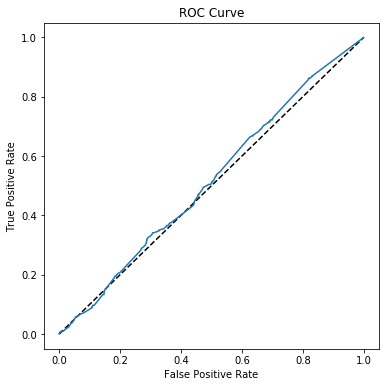

In [399]:
y_pred = cv.best_estimator_.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [400]:
print("AUC:",roc_auc_score(y_test, y_pred))

AUC: 0.5160482974830581


In [401]:
features = pd.DataFrame(list(zip(X.columns, cv.best_estimator_.feature_importances_)), columns = ['Feature', 'Importance'])
features.sort_values(by='Importance', ascending=False)

,Feature,Importance
3,days_inactive,0.495280
2,days_active,0.213729
0,opted_in_to_mailing_list,0.037949
10,creation_source_ORG_INVITE,0.035275
12,creation_source_SIGNUP,0.033229
1,enabled_for_marketing_drip,0.028872
4,email_gmail,0.027316
11,creation_source_PERSONAL_PROJECTS,0.020619
5,email_gustr,0.020530
9,email_yahoo,0.019439
